# Customizing Matplotlib: Understanding and Configuring rcParams

## Introduction

I don't know about you, but one of the things that's been driving me crazy about using matplotlib is the look of the plots. Though they serve their purpose, and allow us to explore our data, frankly, they're not very attractive. The default styling of matplotlib was designed to be functional rather than visually appealing, prioritizing clarity over aesthetics.

Fortunately, you're not stuck with the matplotlib default look and feel, and in this lesson, we'll learn all about matplotlib's extreme configurability, and see how to change the default appearance for all of our plots. Customization is essential for:

- Creating publication-quality graphics
- Maintaining consistent branding across visualizations
- Improving readability for specific audiences
- Highlighting important aspects of your data

But, of course, before we can get started, like always, we'll need to run the standard setup code to get our Jupyter notebook ready to go.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Enable inline plotting in the notebook
%matplotlib inline

## The `rcParams` Object

All of matplotlib's settings are stored in a global dict (or, more accurately, `dict`-like object) called `rcParams` on the `matplotlib` module. The name `rc` comes from the Unix tradition of using "rc" files for configuration (the "rc" stands for "runtime configuration").

The `rcParams` dictionary contains hundreds of parameters that control every aspect of matplotlib, from figure sizes and DPI settings to font properties, line styles, colors, and much more. These parameters are organized in a hierarchical fashion using dot notation (e.g., `lines.linewidth`, `axes.grid`).

The code below displays this collection of default settings for us to peruse. This will output a large dictionary with all the current configuration values.

In [2]:
# Display the entire rcParams dictionary
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

Judging by the size of the `rcParams` object, it looks like matplotlib gives us quite a bit of capability when it comes to changing its look and feel. And, all we need to do to make these changes, is simply update the values in this dictionary. 

The parameters are grouped into logical categories such as:
- `figure.*`: Controls figure dimensions, DPI, etc.
- `lines.*`: Controls line properties (width, style, etc.)
- `axes.*`: Controls axes properties (grid, spines, etc.)
- `xtick.*`/`ytick.*`: Controls tick properties
- `font.*`: Controls font properties

But, before we start changing the default configuration of matplotlib, let's take one last look at a typical matplotlib plot just to remind ourselves of how they look with the default settings.

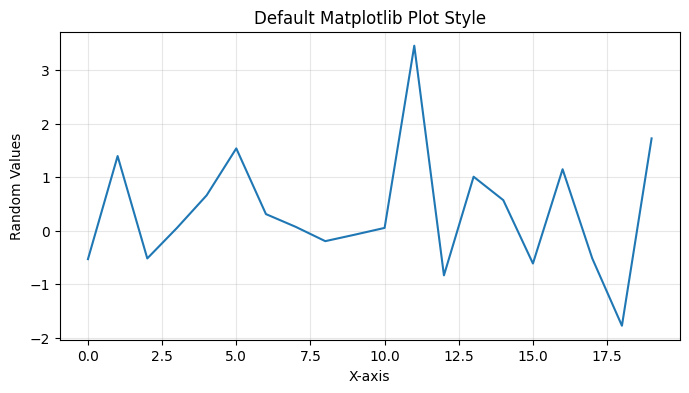

In [3]:
# Generate a simple line plot with random data using default settings
plt.figure(figsize=(8, 4))  # Create a figure with specified size
plt.plot(np.random.randn(20))
plt.title("Default Matplotlib Plot Style")
plt.xlabel("X-axis")
plt.ylabel("Random Values")
plt.grid(alpha=0.3)
plt.show()

## Configuring matplotlib

Now, we're ready to start playing around with the look and feel of our plots. The power of `rcParams` is that any changes we make will apply to all subsequent plots in our session unless we explicitly override them.

Since we created a simple line graph above, we'll stick with that as our example plot. So, let's see what kinds of things we can change with respect to the lines in our graphs.

The code below, loops through the `rcParams` object, and prints out only the line-specific keys and their corresponding default values. This helps us focus only on the parameters relevant to line customization.

In [4]:
# Print all line-related parameters and their current values
print("LINE-RELATED PARAMETERS IN MATPLOTLIB")
print("-" * 50)
for key, val in mpl.rcParams.items():
    if key.startswith('lines.'):
        print('%-40s:%s' % (key, val))

LINE-RELATED PARAMETERS IN MATPLOTLIB
--------------------------------------------------
lines.antialiased                       :True
lines.color                             :C0
lines.dash_capstyle                     :CapStyle.butt
lines.dash_joinstyle                    :JoinStyle.round
lines.dashdot_pattern                   :[6.4, 1.6, 1.0, 1.6]
lines.dashed_pattern                    :[3.7, 1.6]
lines.dotted_pattern                    :[1.0, 1.65]
lines.linestyle                         :-
lines.linewidth                         :1.5
lines.marker                            :None
lines.markeredgecolor                   :auto
lines.markeredgewidth                   :1.0
lines.markerfacecolor                   :auto
lines.markersize                        :6.0
lines.scale_dashes                      :True
lines.solid_capstyle                    :CapStyle.projecting
lines.solid_joinstyle                   :JoinStyle.round


Hmm, it looks like there's quite a few settings we can change with respect to the appearance of the lines in our plots. Here are some of the most commonly used parameters:

- `lines.linewidth`: Controls the thickness of the line
- `lines.linestyle`: Controls the style of the line (solid, dashed, dotted, etc.)
- `lines.marker`: Controls the marker shape used at data points
- `lines.markersize`: Controls the size of markers
- `lines.color`: Controls the default color of lines

Let's start with something simple, but obvious, like the width of the lines in our graphs. According to the list of key/value pairs we printed out in the previous cell, the current line width is just 1.0. Let's bump that up quite a bit to really make our lines stand out. Let's try, say 10.

In [5]:
# Set the line width to a much larger value
mpl.rcParams['lines.linewidth'] = 10

Now, let's try our plot again and see how it looks with our default line width set to a value of 10. This will affect all line plots we create until we change this parameter again or restart the kernel.

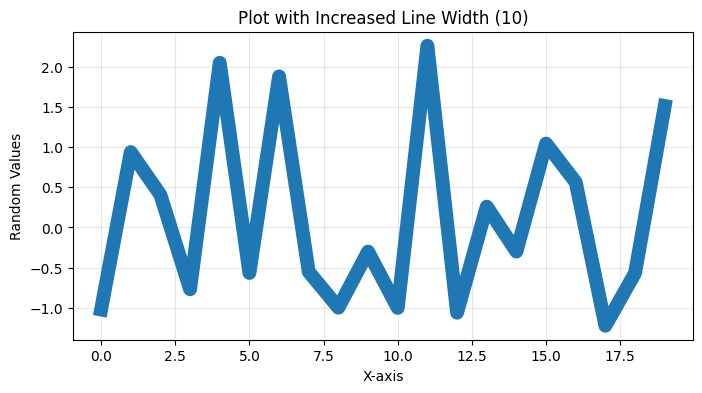

In [6]:
# Generate the same plot but now with thicker lines
plt.figure(figsize=(8, 4))
plt.plot(np.random.randn(20))
plt.title("Plot with Increased Line Width (10)")
plt.xlabel("X-axis")
plt.ylabel("Random Values")
plt.grid(alpha=0.3)
plt.show()

Well, that looks significantly different, but we can take it even further. 

### The `rc()` Function: Setting Multiple Parameters at Once

Now, if we wanted to set several different line attributes, instead of just one, we could do exactly what we did above, which is to set each attribute individually, but matplotlib also provides a function called `rc` that allows us to set several attributes for a specific group with a single line of code. 

The syntax for the `rc()` function is:
```python
mpl.rc('group', param1=value1, param2=value2, ...)
```

Where 'group' is the parameter category (like 'lines', 'axes', 'figure', etc.)

The code in the next cell uses the `matplotlib.rc` function to set the line width, style, and marker shape all with one function call.

In [7]:
# Set multiple line properties at once using the rc() function
mpl.rc('lines', linewidth=2, linestyle='--', marker='s')

And, now, we can run our line graph example again to see what kind of effect the last bit of code had on the look and feel of our plots. This time we should see:

1. A line width of 2 (thinner than before but still thicker than the default)
2. A dashed line style ('--')
3. Square markers ('s') at each data point

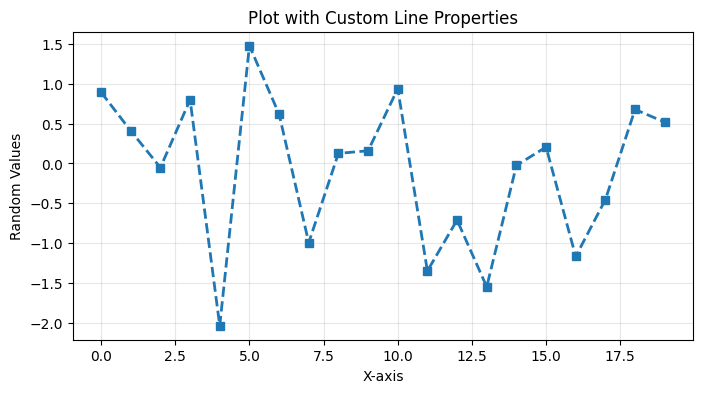

In [8]:
# Generate the same plot with our new line settings
plt.figure(figsize=(8, 4))
plt.plot(np.random.randn(20))
plt.title("Plot with Custom Line Properties")
plt.xlabel("X-axis")
plt.ylabel("Random Values")
plt.grid(alpha=0.3)
plt.show()

That's pretty cool that we can change the look and feel of all our plots with just a few lines of code. 

## Making Permanent Changes with the `matplotlibrc` File

Now, we can create custom styles that look quite a bit better than the default appearance that ships with matplotlib. The only problem though, is that it's kind of a pain to copy and paste a bunch of commands to each notebook, script, or interactive terminal session to change the look and feel of our plots. If we've found a style that we like, wouldn't it be better if we could just make that our default style? 

Well, fortunately, you can! In fact, matplotlib makes this kind of configuration super easy. You simply need to create a file called `matplotlibrc` to hold your desired default settings.

### The matplotlibrc File Search Path

The `matplotlibrc` file can be stored in one of four different locations and matplotlib will look for this file in each location in the following order:

1. **Current working directory**: Add the file to your current working directory to give the current project its own specific custom set of properties. This is useful for project-specific styling.

2. **Custom location via environment variable**: Define the environment variable `$MATPLOTLIBRC` to hold a directory where you would like to keep your global `matplotlibrc` file. This is useful for maintaining a consistent style across multiple projects.

3. **User configuration directory**: Place the file in your default config directory, which you can get by calling the `get_configdir` function. This applies to all of your matplotlib use on your account.

4. **Default installation file**: If matplotlib cannot find a `matplotlibrc` file in one of these locations, it will load the file that was installed with matplotlib. This contains the standard defaults.

This last location is the home of the default configuration file that comes with a standard matplotlib installation and you should never make any changes directly to it, but that doesn't mean that you can't take a look at its contents to get an idea of what a `matplotlibrc` file looks like. 

We can find this file by calling the `matplotlib_fname` function. This function will return the location of the file currently being used, and since we are currently using the default settings that matplotlib ships with, this should return the location of the default `matplotlibrc` file.

In [9]:
# Get the path to the current matplotlibrc file
mpl.matplotlib_fname()

'/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/mpl-data/matplotlibrc'

Let's `cat` the file now to get a look at a typical matplotlibrc file. This will show us the structure and content of the configuration file, which can serve as a template for our own custom configuration.

In [10]:
# Display the contents of the current matplotlibrc file
!cat {mpl.matplotlib_fname()}

#### MATPLOTLIBRC FORMAT

## NOTE FOR END USERS: DO NOT EDIT THIS FILE!
##
## This is a sample Matplotlib configuration file - you can find a copy
## of it on your system in site-packages/matplotlib/mpl-data/matplotlibrc
## (relative to your Python installation location).
## DO NOT EDIT IT!
##
## If you wish to change your default style, copy this file to one of the
## following locations:
##     Unix/Linux:
##         $HOME/.config/matplotlib/matplotlibrc OR
##         $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
##     Other platforms:
##         $HOME/.matplotlib/matplotlibrc
## and edit that copy.
##
## See https://matplotlib.org/stable/users/explain/customizing.html#customizing-with-matplotlibrc-files
## for more details on the paths which are checked for the configuration file.
##
## Blank lines, or lines starting with a comment symbol, are ignored, as are
## trailing comments.  Other lines must have the format:
##     key: val  # optional comment
##
## F

### Understanding the matplotlibrc File Format

As you can see, a `matplotlibrc` file just consists of a bunch of key/value pairs. The keys are all namespaced and each key is separated from its corresponding value by a colon. The file follows these formatting rules:

- Lines starting with `#` are comments and are ignored
- Parameter names and values are separated by a colon `:`
- Parameter names use dot notation to indicate hierarchy (e.g., `lines.linewidth`)
- Empty lines are ignored
- Whitespace around parameter names and values is ignored

So, as an example, if you wanted to make the last set of changes we did by calling the `matplotlib.rc` function permanent, you would simply create a new `matplotlibrc` file in one of the three locations mentioned above, and add the following lines to that file to override the default look and feel.

```python
lines.marker                : s
lines.linestyle             : --
lines.linewidth             : 2.0
```

### Creating a Custom matplotlibrc File

Let's go ahead and give that option a try now. In the next cell, we'll create a new `matplotlibrc` file in the default configuration directory and add to it the three lines above.

In [ ]:
import os

# Get the location for the user's configuration directory
matplotlibrc_location = os.path.join(mpl.get_configdir(), 'matplotlibrc')
print(f"Creating matplotlibrc file at: {matplotlibrc_location}")

# Define the content we want to put in our matplotlibrc file
matplotlib_content = """# Custom matplotlibrc file
# Created for demonstration purposes

# Line properties
lines.marker                : s     # square marker
lines.linestyle             : --    # dashed line
lines.linewidth             : 2.0   # medium line width
"""

# Write the content to the file
with open(matplotlibrc_location, 'w') as fout:
    fout.write(matplotlib_content.strip())

### Testing Our Custom Configuration

Now, to see the results of this change, we'll need to restart the kernel and then do the normal setup once again. This is because matplotlib only reads the `matplotlibrc` file at startup.

After restarting the kernel, the first thing we need to do is import the necessary libraries and set up our environment. I've copied the standard setup code below for convenience, so let's go ahead and restart the kernel now and see if our `matplotlibrc` file makes a difference.

*Note: You'll need to manually restart the kernel before running the next cell.*

In [ ]:
# Standard setup after kernel restart
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Now, if we call the `matploblib_fname` function again, we should see that matplotlib is now using our own `matplotlibrc` file that we just created, so let's give that a try now. This will confirm that matplotlib is reading our custom configuration file instead of the default one.

In [ ]:
# Check which matplotlibrc file is being used now
print(f"Matplotlib is now using: {mpl.matplotlib_fname()}")

And, that looks good, we're no longer using the default `matplotlibrc` file that comes with a standard install of matplotlib. Now, let's try our plot again and see if it looks like the one we made earlier after calling the `matplotlib.rc` function. If our custom configuration is working correctly, we should see a plot with dashed lines, square markers, and a line width of 2.0.

In [ ]:
# Test plot with our custom matplotlibrc settings
plt.figure(figsize=(8, 4))
plt.plot(np.random.randn(20))
plt.title("Plot Using Custom matplotlibrc File")
plt.xlabel("X-axis")
plt.ylabel("Random Values")
plt.grid(alpha=0.3)
plt.show()

And, that looks exactly the same! This demonstrates that our matplotlibrc file is working correctly and that we can permanently customize matplotlib's appearance.

### Cleaning Up

Now, before we move on, let's just clean up our environment to make sure that we don't continue to see our plots using the obnoxious style that we just created. To do that, we simply need to remove the `matplotlibrc` file that we created above, and the code in the next cell does that for us.  

In [ ]:
# Clean up by removing our custom matplotlibrc file
os.remove(matplotlibrc_location)
print(f"Removed custom matplotlibrc file from {matplotlibrc_location}")

## Conclusion

And, that's also going to bring us to the very end of this lesson. To recap, we learned that we're not stuck with the default look and feel that matplotlib ships with. Oh no, in fact, matplotlib gives us a ton of control to modify the appearance of our plots and we can do so on either on the fly, through the direct manipulation of the `rcParams` object, or permanently by adding the default settings we want to a `matplotlibrc` file.

### Key Takeaways

1. **rcParams Dictionary**: All matplotlib settings are stored in a global dictionary called `rcParams`
2. **Individual Parameter Updates**: You can change individual parameters using dictionary syntax: `mpl.rcParams['param.name'] = value`
3. **Group Parameter Updates**: You can change multiple parameters for a group using the `rc()` function: `mpl.rc('group', param1=value1, param2=value2)`
4. **Permanent Configurations**: Create a `matplotlibrc` file to make your custom settings permanent
5. **Configuration Locations**: Matplotlib looks for configuration files in multiple locations following a specific search order

By customizing matplotlib, you can create more visually appealing and professional plots that better represent your data and your intended message.